In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [14]:
herodata = pd.read_csv('../data/fix.csv', sep=';')

In [15]:
herodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hero Name                 128 non-null    object 
 1   Hero ID                   128 non-null    int64  
 2   Roles                     128 non-null    object 
 3   Specialties               128 non-null    object 
 4   Recommended Lane          128 non-null    object 
 5   Second Lane               40 non-null     object 
 6   Release year              128 non-null    int64  
 7   Tier                      128 non-null    object 
 8   Meta                      128 non-null    object 
 9   Difficulty                128 non-null    object 
 10  Durability Rating         128 non-null    object 
 11  Ability Effects Rating    128 non-null    object 
 12  Offense Rating            128 non-null    object 
 13  Scaling Rating            128 non-null    object 
 14  Cooldown R

In [16]:
# split_columns = herodata['Hero Name;Win Rate (%);Popularity (%);Ban Rate (%);Hero ID;Roles;Specialties;Recommended Lane;Release year;Tier;Meta;Difficulty;Durability Rating;Ability Effects Rating;Offense Rating;Scaling Rating;Cooldown Rating;Item Dependency Rating;Mobility Rating;Crowd Control Rating;Base Stats Growth Rating;Ultimate Impact Rating;Column1;Gameplay;Sinergi'].str.split(';', expand=True)

In [17]:
# column_names = [
#     'Hero Name', 'Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)', 'Hero ID', 'Roles', 
#     'Specialties', 'Recommended Lane', 'Release year', 'Tier', 'Meta', 'Difficulty', 
#     'Durability Rating', 'Ability Effects Rating', 'Offense Rating', 'Scaling Rating', 
#     'Cooldown Rating', 'Item Dependency Rating', 'Mobility Rating', 'Crowd Control Rating', 
#     'Base Stats Growth Rating', 'Ultimate Impact Rating', 'Column1', 'Gameplay', 'Sinergi'
# ]

In [18]:
# split_columns.columns = column_names

In [19]:
# herodata = pd.concat([herodata, split_columns], axis=1)

In [20]:
# herodata.drop(columns=['Hero Name;Win Rate (%);Popularity (%);Ban Rate (%);Hero ID;Roles;Specialties;Recommended Lane;Release year;Tier;Meta;Difficulty;Durability Rating;Ability Effects Rating;Offense Rating;Scaling Rating;Cooldown Rating;Item Dependency Rating;Mobility Rating;Crowd Control Rating;Base Stats Growth Rating;Ultimate Impact Rating;Column1;Gameplay;Sinergi'], inplace=True)

In [21]:
herodata.isnull().sum()

Hero Name                    0
Hero ID                      0
Roles                        0
Specialties                  0
Recommended Lane             0
Second Lane                 88
Release year                 0
Tier                         0
Meta                         0
Difficulty                   0
Durability Rating            0
Ability Effects Rating       0
Offense Rating               0
Scaling Rating               0
Cooldown Rating              0
Item Dependency Rating       0
Mobility Rating              0
Crowd Control Rating         0
Base Stats Growth Rating     0
Ultimate Impact Rating       0
Column1                      0
Gameplay                     0
Sinergi                      1
Win Rate (%)                 0
Popularity (%)               0
Ban Rate (%)                 0
dtype: int64

In [22]:
herodata['Second Lane'] = herodata['Second Lane'].fillna('Tidak Ada')

In [23]:
herodata['Recommended Lane'].unique()

array(['Jungler', 'Roam', 'Exp Lane', 'Mid Lane', 'Gold Lane'],
      dtype=object)

In [24]:
herodata['Ultimate Impact Rating'].unique()

array(['Early Game', 'Mid Game', 'All Game Phases', 'Late Game',
       'Support'], dtype=object)

### Normalisasi Data Hasil Update

Sinergi, Hero Id, Release Year

In [25]:
# herodata['Sinergi'] = (herodata['Sinergi'] / 10).astype(int)
# herodata['Hero ID'] = (herodata['Hero ID'] / 10).astype(int).astype(object)
# herodata['Release year'] = (herodata['Release year'] / 10).astype(int).astype(object)

### Lanjut Preprocessing

In [26]:
herodataEncoded = herodata[['Scaling Rating', 'Recommended Lane', 'Second Lane',
       'Cooldown Rating', 'Item Dependency Rating', 'Mobility Rating',
       'Crowd Control Rating', 'Base Stats Growth Rating']]

In [27]:
labelEncoder = LabelEncoder()

label_mappings = {}

for col in herodataEncoded.columns:
    herodataEncoded.loc[:, col] = labelEncoder.fit_transform(herodataEncoded[col])
    label_mappings[col] = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

In [28]:
encoder = OneHotEncoder(sparse_output=False)
oneCol = encoder.fit_transform(herodata[['Ultimate Impact Rating']])

In [29]:
encoded_columns = encoder.get_feature_names_out(['Ultimate Impact Rating'])

In [30]:
oneCol = pd.DataFrame(oneCol, columns=encoded_columns)

In [31]:
sortedCol =  herodata[['Hero Name', 'Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)']]

In [32]:
fitur = pd.concat([sortedCol, herodataEncoded, oneCol], axis=1)

In [33]:
fitur.head()

,Hero Name,Win Rate (%),Popularity (%),Ban Rate (%),Scaling Rating,Recommended Lane,Second Lane,Cooldown Rating,Item Dependency Rating,Mobility Rating,Crowd Control Rating,Base Stats Growth Rating,Ultimate Impact Rating_All Game Phases,Ultimate Impact Rating_Early Game,Ultimate Impact Rating_Late Game,Ultimate Impact Rating_Mid Game,Ultimate Impact Rating_Support
0,Aamon,5065,20,9,0,2,5,1,0,0,1,1,0.0,1.0,0.0,0.0,0.0
1,Akai,4899,32,8,1,4,0,1,1,0,0,0,0.0,0.0,0.0,1.0,0.0
2,Aldous,4708,18,6,0,0,1,1,0,0,1,1,0.0,0.0,0.0,1.0,0.0
3,Alice,5388,39,138,0,0,2,1,0,0,1,1,0.0,0.0,0.0,1.0,0.0
4,Alpha,4657,93,16,0,2,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0


In [34]:
fitur['Recommended Lane'].unique()

array([2, 4, 0, 3, 1], dtype=object)

In [35]:
fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Hero Name                               128 non-null    object 
 1   Win Rate (%)                            128 non-null    int64  
 2   Popularity (%)                          128 non-null    int64  
 3   Ban Rate (%)                            128 non-null    int64  
 4   Scaling Rating                          128 non-null    object 
 5   Recommended Lane                        128 non-null    object 
 6   Second Lane                             128 non-null    object 
 7   Cooldown Rating                         128 non-null    object 
 8   Item Dependency Rating                  128 non-null    object 
 9   Mobility Rating                         128 non-null    object 
 10  Crowd Control Rating                    128 non-null    object

In [36]:
fitur[['Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)']] = fitur[['Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)']].astype(float) / 100

In [37]:
fitur.head(10)

,Hero Name,Win Rate (%),Popularity (%),Ban Rate (%),Scaling Rating,Recommended Lane,Second Lane,Cooldown Rating,Item Dependency Rating,Mobility Rating,Crowd Control Rating,Base Stats Growth Rating,Ultimate Impact Rating_All Game Phases,Ultimate Impact Rating_Early Game,Ultimate Impact Rating_Late Game,Ultimate Impact Rating_Mid Game,Ultimate Impact Rating_Support
0,Aamon,50.65,0.20,0.09,0,2,5,1,0,0,1,1,0.0,1.0,0.0,0.0,0.0
1,Akai,48.99,0.32,0.08,1,4,0,1,1,0,0,0,0.0,0.0,0.0,1.0,0.0
2,Aldous,47.08,0.18,0.06,0,0,1,1,0,0,1,1,0.0,0.0,0.0,1.0,0.0
3,Alice,53.88,0.39,1.38,0,0,2,1,0,0,1,1,0.0,0.0,0.0,1.0,0.0
4,Alpha,46.57,0.93,0.16,0,2,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0
5,Alucard,53.44,0.63,0.28,1,2,0,1,0,0,1,1,0.0,0.0,0.0,1.0,0.0
6,Angela,51.48,2.21,4.54,1,4,3,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0
7,Argus,51.01,0.46,1.53,1,0,1,1,0,1,1,1,0.0,0.0,0.0,1.0,0.0
8,Arlott,48.69,0.28,0.07,1,0,4,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
9,Atlas,46.12,0.28,0.06,1,4,5,1,1,0,0,0,0.0,0.0,0.0,1.0,0.0


In [38]:
fitur.describe()

,Win Rate (%),Popularity (%),Ban Rate (%),Ultimate Impact Rating_All Game Phases,Ultimate Impact Rating_Early Game,Ultimate Impact Rating_Late Game,Ultimate Impact Rating_Mid Game,Ultimate Impact Rating_Support
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,49.563594,0.780625,7.090234,0.109375,0.101562,0.140625,0.617188,0.031250
std,3.283285,0.672149,18.531880,0.313335,0.303259,0.349000,0.487983,0.174676
min,40.530000,0.050000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.527500,0.280000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.595000,0.540000,0.265000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,51.282500,1.217500,1.535000,0.000000,0.000000,0.000000,1.000000,0.000000
max,59.250000,3.310000,97.540000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
fitur.columns

Index(['Hero Name', 'Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)',
       'Scaling Rating', 'Recommended Lane', 'Second Lane', 'Cooldown Rating',
       'Item Dependency Rating', 'Mobility Rating', 'Crowd Control Rating',
       'Base Stats Growth Rating', 'Ultimate Impact Rating_All Game Phases',
       'Ultimate Impact Rating_Early Game', 'Ultimate Impact Rating_Late Game',
       'Ultimate Impact Rating_Mid Game', 'Ultimate Impact Rating_Support'],
      dtype='object')

## Hitung Strength

In [40]:
def calculateStrength(row):
    
    # Bobot untuk setiap kategori
    weights = {
        'Win Rate': 0.3,
        'Popularity': 0.1,
        'Ban Rate': 0.1,
        'Scaling': 0.05,
        'Cooldown': 0.05,
        'Item Dependency': 0.05,
        'Mobility': 0.05,
        'Crowd Control': 0.05,
        'Base Stats Growth': 0.05,
        'Ultimate Impact All Phases': 0.05,
        'Ultimate Impact Early Game': 0.03,
        'Ultimate Impact Late Game': 0.03,
        'Ultimate Impact Mid Game': 0.03,
        'Ultimate Impact Support': 0.03
    }
    
    # Normalisasi dan perhitungan
    strength = (
        row['Win Rate (%)'] / 100 * weights['Win Rate'] +
        row['Popularity (%)'] * weights['Popularity'] +
        row['Ban Rate (%)'] / 100 * weights['Ban Rate'] +
        row['Scaling Rating'] * weights['Scaling'] +
        row['Cooldown Rating'] * weights['Cooldown'] +
        row['Item Dependency Rating'] * weights['Item Dependency'] +
        row['Mobility Rating'] * weights['Mobility'] +
        row['Crowd Control Rating'] * weights['Crowd Control'] +
        row['Base Stats Growth Rating'] * weights['Base Stats Growth'] +
        row['Ultimate Impact Rating_All Game Phases'] * weights['Ultimate Impact All Phases'] +
        row['Ultimate Impact Rating_Early Game'] * weights['Ultimate Impact Early Game'] +
        row['Ultimate Impact Rating_Late Game'] * weights['Ultimate Impact Late Game'] +
        row['Ultimate Impact Rating_Mid Game'] * weights['Ultimate Impact Mid Game'] +
        row['Ultimate Impact Rating_Support'] * weights['Ultimate Impact Support']
    ) * 100  
    
    return round(strength, 2)

In [41]:
fitur['Strength Rating (%)'] = fitur.apply(calculateStrength, axis=1)
fitur = fitur.sort_values('Strength Rating (%)', ascending=False)

In [42]:
fitur.insert(1, 'Role', herodata['Roles'])

In [43]:
fitur.to_csv('../data/list Hero.csv', index=False)

In [44]:
fitur.columns

Index(['Hero Name', 'Role', 'Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)',
       'Scaling Rating', 'Recommended Lane', 'Second Lane', 'Cooldown Rating',
       'Item Dependency Rating', 'Mobility Rating', 'Crowd Control Rating',
       'Base Stats Growth Rating', 'Ultimate Impact Rating_All Game Phases',
       'Ultimate Impact Rating_Early Game', 'Ultimate Impact Rating_Late Game',
       'Ultimate Impact Rating_Mid Game', 'Ultimate Impact Rating_Support',
       'Strength Rating (%)'],
      dtype='object')

## Normalisasi Role

### Helper Functions

In [45]:
def normalize_role(role):
    if role.startswith('Fighter'):
        return 'Fighter'
    elif role.startswith('Tank'):
        return 'Tank'
    elif role.startswith('Assassin'):
        return 'Assassin'
    elif role.startswith('Mage'):
        return 'Mage'
    elif role.startswith('Marksman'):
        return 'Marksman'
    elif role.startswith('Support'):
        return 'Support'
    return role  

fitur['Role'] = fitur['Role'].apply(normalize_role)

In [46]:
def normalize_role(role):
    if role.startswith('Fighter'):
        return 'Exp Lane'
    elif role.startswith('Tank'):
        return 'Roam'
    elif role.startswith('Assassin'):
        return 'Jungler'
    elif role.startswith('Mage'):
        return 'Mid Laner'
    elif role.startswith('Marksman'):
        return 'Gold Laner'
    elif role.startswith('Support'):
        return 'Roam'
    return role  

fitur['Role'] = fitur['Role'].apply(normalize_role)

In [47]:
def getHeroData(hero_name):
    heroData = fitur[fitur['Hero Name'].str.lower() == hero_name.lower()]
    if not heroData.empty:
        return heroData.iloc[0]
    else:
        return None

In [48]:
def matchingHeroLane(dataHero, labelMap, df):
    # print('Ini DataHero', dataHero)
    # print('Ini DF', df)
    # Reverse the mappings in labelMap
    reverse_mappings = {
        col: {v: k for k, v in mapping.items()}
        for col, mapping in labelMap.items()
    }

    # Define the mapping of index to lane
    index_to_lane = {
        0: 'Jungler',
        1: 'Mid Laner',
        2: 'Gold Laner',
        3: 'Exp Lane',
        4: 'Roam'
    }

    unmatchedLane = 0  # Default to 0 if no unmatched lanes are found

    if isinstance(dataHero, dict):
        # Convert dataHero to a pandas Series if it's a dictionary
        dataHero = pd.Series(dataHero)

    if dataHero is not None:
        # Decode 'Recommended Lane' and 'Second Lane' using reverse_mappings
        dataHero['Recommended Lane'] = reverse_mappings['Recommended Lane'].get(
            dataHero['Recommended Lane'], dataHero['Recommended Lane']
        )

        dataHero['Second Lane'] = reverse_mappings['Second Lane'].get(
            dataHero['Second Lane'], dataHero['Second Lane']
        )

        # Check if the hero's lanes match the lane corresponding to the index
        for index, lane in index_to_lane.items():
            if dataHero['Recommended Lane'] != lane and dataHero['Second Lane'] != lane:
                unmatchedLane += 1
            else:
                unmatchedLane += 0
    else:
        print("dataHero is empty")

    return unmatchedLane  # Return the number of unmatched lanes

In [49]:
def calculateTeamStrength(team, labelMap, df):
    totalStrength = 0
    hero_data = {}
    for hero in team:
        data = getHeroData(hero)
        
        unmatchedLane = matchingHeroLane(data, labelMap, df)

        if data is not None:
            totalStrength += data['Strength Rating (%)']
            hero_data[hero] = data
        else:
            print(f"Hero {hero} tidak ditemukan dalam dataset.")
    return totalStrength, hero_data, unmatchedLane

In [50]:
def calculateWinPercentage(team1, team2, df, labelMap):
    # Hitung kekuatan dan data dari masing-masing tim
    team1Strength, team1_data, unmatchedLane1 = calculateTeamStrength(team1, labelMap, df)
    team2Strength, team2_data, unmatchedLane2 = calculateTeamStrength(team2, labelMap, df)

    print(f"Lane yang tidak cocok untuk tim 1: {unmatchedLane1}")
    print(f"Lane yang tidak cocok untuk tim 2: {unmatchedLane2}")

    # Hitung total kekuatan gabungan
    totalStrength = team1Strength + team2Strength
    if totalStrength == 0:
        return 50.0, 50.0, team1_data, team2_data  # Hindari pembagian dengan nol

    # Hitung persentase dasar berdasarkan kekuatan
    team1Base = (team1Strength / totalStrength) * 100
    team2Base = (team2Strength / totalStrength) * 100

    # Terapkan penalti dari lane yang tidak cocok (anggap 5% per mismatch)
    penalty_per_unmatched = 5
    team1Penalty = unmatchedLane1 * penalty_per_unmatched
    team2Penalty = unmatchedLane2 * penalty_per_unmatched

    team1WinPercentage = max(team1Base - team1Penalty, 0)
    team2WinPercentage = max(team2Base - team2Penalty, 0)

    # Normalisasi ulang agar total tetap 100%
    total = team1WinPercentage + team2WinPercentage
    if total > 0:
        team1WinPercentage = (team1WinPercentage / total) * 100
        team2WinPercentage = (team2WinPercentage / total) * 100
    else:
        team1WinPercentage = 50.0
        team2WinPercentage = 50.0

    return team1WinPercentage, team2WinPercentage, team1_data, team2_data

In [51]:
def createTeamBasedOnRoles(hero_data, excluded_heroes=[]):
    # Role baru yang digunakan untuk tim
    roles = ['Exp Lane', 'Roam', 'Mid Laner', 'Gold Laner', 'Jungler']
    team = []
    
    for role in roles:
        # Filter hero yang memiliki role yang sesuai dan tidak termasuk dalam excluded_heroes
        heroes_with_role = hero_data[hero_data['Role'].str.contains(role) & (~hero_data['Hero Name'].isin(excluded_heroes))]
        
        # Jika ada hero yang tersisa, pilih satu secara acak
        if not heroes_with_role.empty:
            selected_hero = heroes_with_role.sample(1)
            team.append(selected_hero['Hero Name'].values[0])
            excluded_heroes.append(selected_hero['Hero Name'].values[0])  

    return team

In [52]:
def generate_match_data(team1, team2, team1_data, team2_data, labelMap, df):
    team1WinPercentage, team2WinPercentage, team1_data_processed, team2_data_processed = calculateWinPercentage(team1, team2, df, labelMap)
    
    # Data untuk setiap hero di Tim 1
    team1_data_processed = {
        f'team1_Hero_{i+1}_Name': team1_data[hero]['Hero Name'] for i, hero in enumerate(team1)
    }
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Role': team1_data[hero]['Role'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Win_Rate': team1_data[hero]['Win Rate (%)'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Popularity': team1_data[hero]['Popularity (%)'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ban_Rate': team1_data[hero]['Ban Rate (%)'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Scaling_Rating': team1_data[hero]['Scaling Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Cooldown_Rating': team1_data[hero]['Cooldown Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Item_Dependency_Rating': team1_data[hero]['Item Dependency Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Mobility_Rating': team1_data[hero]['Mobility Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Crowd_Control_Rating': team1_data[hero]['Crowd Control Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Base_Stats_Growth_Rating': team1_data[hero]['Base Stats Growth Rating'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_All_Game_Phases': team1_data[hero]['Ultimate Impact Rating_All Game Phases'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_Early_Game': team1_data[hero]['Ultimate Impact Rating_Early Game'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_Late_Game': team1_data[hero]['Ultimate Impact Rating_Late Game'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_Mid_Game': team1_data[hero]['Ultimate Impact Rating_Mid Game'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Ultimate_Impact_Rating_Support': team1_data[hero]['Ultimate Impact Rating_Support'] for i, hero in enumerate(team1)
    })
    team1_data_processed.update({
        f'team1_Hero_{i+1}_Strength_Rating': team1_data[hero]['Strength Rating (%)'] for i, hero in enumerate(team1)
    })
    
    # Data untuk setiap hero di Tim 2
    team2_data_processed = {
        f'team2_Hero_{i+1}_Name': team2_data[hero]['Hero Name'] for i, hero in enumerate(team2)
    }
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Role': team2_data[hero]['Role'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Win_Rate': team2_data[hero]['Win Rate (%)'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Popularity': team2_data[hero]['Popularity (%)'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ban_Rate': team2_data[hero]['Ban Rate (%)'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Scaling_Rating': team2_data[hero]['Scaling Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Cooldown_Rating': team2_data[hero]['Cooldown Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Item_Dependency_Rating': team2_data[hero]['Item Dependency Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Mobility_Rating': team2_data[hero]['Mobility Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Crowd_Control_Rating': team2_data[hero]['Crowd Control Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Base_Stats_Growth_Rating': team2_data[hero]['Base Stats Growth Rating'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_All_Game_Phases': team2_data[hero]['Ultimate Impact Rating_All Game Phases'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_Early_Game': team2_data[hero]['Ultimate Impact Rating_Early Game'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_Late_Game': team2_data[hero]['Ultimate Impact Rating_Late Game'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_Mid_Game': team2_data[hero]['Ultimate Impact Rating_Mid Game'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Ultimate_Impact_Rating_Support': team2_data[hero]['Ultimate Impact Rating_Support'] for i, hero in enumerate(team2)
    })
    team2_data_processed.update({
        f'team2_Hero_{i+1}_Strength_Rating': team2_data[hero]['Strength Rating (%)'] for i, hero in enumerate(team2)
    })
    
    # Data tim 1 dan tim 2
    match_data = {**team1_data_processed, **team2_data_processed, 'Persentase_Kemenangan_Tim_1': team1WinPercentage, 'Persentase_Kemenangan_Tim_2': team2WinPercentage}
    
    return match_data

In [53]:
def labelResult(row):
    if row['Persentase_Kemenangan_Tim_1'] > row['Persentase_Kemenangan_Tim_2']:
        return 'Menang'
    elif row['Persentase_Kemenangan_Tim_1'] < row['Persentase_Kemenangan_Tim_2']:
        return 'Kalah'
    else:
        return 'Seri'

### Eksekusi

In [54]:
print(fitur['Role'].value_counts())

Role
Exp Lane      38
Roam          28
Mid Laner     26
Gold Laner    20
Jungler       16
Name: count, dtype: int64


In [55]:
matches = []
for _ in range(5000):  # Increase the number of matches to generate
    excluded_heroes_team1 = []
    excluded_heroes_team2 = []
    
    # Membuat tim 1 dengan memilih hero berdasarkan role
    team1 = createTeamBasedOnRoles(fitur, excluded_heroes_team1)
    excluded_heroes_team1.extend(team1)  # Menambahkan hero yang sudah dipilih ke excluded list tim 1
    
    # Membuat tim 2 dengan memilih hero berdasarkan role, pastikan hero tidak duplikat dengan tim 1
    team2 = createTeamBasedOnRoles(fitur, excluded_heroes_team1 + excluded_heroes_team2)
    excluded_heroes_team2.extend(team2)  # Menambahkan hero yang sudah dipilih ke excluded list tim 2
    
    if len(team1) == 5 and len(team2) == 5:
        # Mendapatkan data hero untuk setiap hero yang telah dipilih dalam tim 1 dan tim 2
        team1_data = {hero: fitur[fitur['Hero Name'] == hero].iloc[0].to_dict() for hero in team1}
        team2_data = {hero: fitur[fitur['Hero Name'] == hero].iloc[0].to_dict() for hero in team2}
        
        match_data = generate_match_data(team1, team2, team1_data, team2_data, label_mappings, fitur)
        matches.append(match_data)
    else:
        print(f"Skipping match generation: Team 1 or Team 2 didn't get 5 heroes.")

Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 3
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 3
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 3
Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 4
Lane yang tidak cocok untuk tim 1: 4
L

In [56]:
match = pd.DataFrame(matches)

In [57]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)

In [58]:
match.head(10)

,team1_Hero_1_Name,team1_Hero_2_Name,team1_Hero_3_Name,team1_Hero_4_Name,team1_Hero_5_Name,team1_Hero_1_Role,team1_Hero_2_Role,team1_Hero_3_Role,team1_Hero_4_Role,team1_Hero_5_Role,team1_Hero_1_Win_Rate,team1_Hero_2_Win_Rate,team1_Hero_3_Win_Rate,team1_Hero_4_Win_Rate,team1_Hero_5_Win_Rate,team1_Hero_1_Popularity,team1_Hero_2_Popularity,team1_Hero_3_Popularity,team1_Hero_4_Popularity,team1_Hero_5_Popularity,team1_Hero_1_Ban_Rate,team1_Hero_2_Ban_Rate,team1_Hero_3_Ban_Rate,team1_Hero_4_Ban_Rate,team1_Hero_5_Ban_Rate,team1_Hero_1_Scaling_Rating,team1_Hero_2_Scaling_Rating,team1_Hero_3_Scaling_Rating,team1_Hero_4_Scaling_Rating,team1_Hero_5_Scaling_Rating,team1_Hero_1_Cooldown_Rating,team1_Hero_2_Cooldown_Rating,team1_Hero_3_Cooldown_Rating,team1_Hero_4_Cooldown_Rating,team1_Hero_5_Cooldown_Rating,team1_Hero_1_Item_Dependency_Rating,team1_Hero_2_Item_Dependency_Rating,team1_Hero_3_Item_Dependency_Rating,team1_Hero_4_Item_Dependency_Rating,team1_Hero_5_Item_Dependency_Rating,team1_Hero_1_Mobility_Rating,team1_Hero_2_Mobility_Rating,team1_Hero_3_Mobility_Rating,team1_Hero_4_Mobility_Rating,team1_Hero_5_Mobility_Rating,team1_Hero_1_Crowd_Control_Rating,team1_Hero_2_Crowd_Control_Rating,team1_Hero_3_Crowd_Control_Rating,team1_Hero_4_Crowd_Control_Rating,team1_Hero_5_Crowd_Control_Rating,team1_Hero_1_Base_Stats_Growth_Rating,team1_Hero_2_Base_Stats_Growth_Rating,team1_Hero_3_Base_Stats_Growth_Rating,team1_Hero_4_Base_Stats_Growth_Rating,team1_Hero_5_Base_Stats_Growth_Rating,team1_Hero_1_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_2_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_3_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_4_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_5_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_1_Ultimate_Impact_Rating_Early_Game,team1_Hero_2_Ultimate_Impact_Rating_Early_Game,team1_Hero_3_Ultimate_Impact_Rating_Early_Game,team1_Hero_4_Ultimate_Impact_Rating_Early_Game,team1_Hero_5_Ultimate_Impact_Rating_Early_Game,team1_Hero_1_Ultimate_Impact_Rating_Late_Game,team1_Hero_2_Ultimate_Impact_Rating_Late_Game,team1_Hero_3_Ultimate_Impact_Rating_Late_Game,team1_Hero_4_Ultimate_Impact_Rating_Late_Game,team1_Hero_5_Ultimate_Impact_Rating_Late_Game,team1_Hero_1_Ultimate_Impact_Rating_Mid_Game,team1_Hero_2_Ultimate_Impact_Rating_Mid_Game,team1_Hero_3_Ultimate_Impact_Rating_Mid_Game,team1_Hero_4_Ultimate_Impact_Rating_Mid_Game,team1_Hero_5_Ultimate_Impact_Rating_Mid_Game,team1_Hero_1_Ultimate_Impact_Rating_Support,team1_Hero_2_Ultimate_Impact_Rating_Support,team1_Hero_3_Ultimate_Impact_Rating_Support,team1_Hero_4_Ultimate_Impact_Rating_Support,team1_Hero_5_Ultimate_Impact_Rating_Support,team1_Hero_1_Strength_Rating,team1_Hero_2_Strength_Rating,team1_Hero_3_Strength_Rating,team1_Hero_4_Strength_Rating,team1_Hero_5_Strength_Rating,team2_Hero_1_Name,team2_Hero_2_Name,team2_Hero_3_Name,team2_Hero_4_Name,team2_Hero_5_Name,team2_Hero_1_Role,team2_Hero_2_Role,team2_Hero_3_Role,team2_Hero_4_Role,team2_Hero_5_Role,team2_Hero_1_Win_Rate,team2_Hero_2_Win_Rate,team2_Hero_3_Win_Rate,team2_Hero_4_Win_Rate,team2_Hero_5_Win_Rate,team2_Hero_1_Popularity,team2_Hero_2_Popularity,team2_Hero_3_Popularity,team2_Hero_4_Popularity,team2_Hero_5_Popularity,team2_Hero_1_Ban_Rate,team2_Hero_2_Ban_Rate,team2_Hero_3_Ban_Rate,team2_Hero_4_Ban_Rate,team2_Hero_5_Ban_Rate,team2_Hero_1_Scaling_Rating,team2_Hero_2_Scaling_Rating,team2_Hero_3_Scaling_Rating,team2_Hero_4_Scaling_Rating,team2_Hero_5_Scaling_Rating,team2_Hero_1_Cooldown_Rating,team2_Hero_2_Cooldown_Rating,team2_Hero_3_Cooldown_Rating,team2_Hero_4_Cooldown_Rating,team2_Hero_5_Cooldown_Rating,team2_Hero_1_Item_Dependency_Rating,team2_Hero_2_Item_Dependency_Rating,team2_Hero_3_Item_Dependency_Rating,team2_Hero_4_Item_Dependency_Rating,team2_Hero_5_Item_Dependency_Rating,team2_Hero_1_Mobility_Rating,team2_Hero_2_Mobility_Rating,team2_Hero_3_Mobility_Rating,team2_Hero_4_Mobility_Rating,team2_Hero_5_Mobility_Rating,team2_Hero_1_Crowd_Control_Rating,team2_Hero_2_Crowd_Control_Rat

In [59]:
match['result'] = match.apply(labelResult, axis=1)

In [60]:
match['result'].value_counts()

result
Kalah     2505
Menang    2495
Name: count, dtype: int64

In [61]:
pd.set_option('display.max_columns', None)

In [62]:
match.to_csv('../data/match history.csv', index=False)

## Uji Coba Perhitungan dengan Data Input

In [63]:
team1 = ['Lolita', 'Harith', 'Vexana', 'Gatotkaca','Hayabusa']
team2 = ['Hylos', 'Ling', 'Edith', 'Moskov','Xavier']

In [64]:
team1WinPercentage, team2WinPercentage, team1, team2 = calculateWinPercentage(team1, team2, fitur, label_mappings)

Lane yang tidak cocok untuk tim 1: 4
Lane yang tidak cocok untuk tim 2: 5


In [65]:
def checkMatch(row) :
    if row['Persentase_Kemenangan_Tim_1'] > row['Persentase_Kemenangan_Tim_2'] and row['result'] == 'Menang' :
        return 'Valid'
    if row['Persentase_Kemenangan_Tim_2'] > row['Persentase_Kemenangan_Tim_1'] and row['result'] == 'Kalah' :
        return 'Valid'
    if row['Persentase_Kemenangan_Tim_1'] == row['Persentase_Kemenangan_Tim_2'] and row['result'] == 'Seri' :
        return 'Draw'
    else :
        return 'Tidak Valid'    

In [66]:
match['validasi'] = match.apply(checkMatch, axis=1)
match[match['validasi'] == 'Tidak Valid'].head()

,team1_Hero_1_Name,team1_Hero_2_Name,team1_Hero_3_Name,team1_Hero_4_Name,team1_Hero_5_Name,team1_Hero_1_Role,team1_Hero_2_Role,team1_Hero_3_Role,team1_Hero_4_Role,team1_Hero_5_Role,team1_Hero_1_Win_Rate,team1_Hero_2_Win_Rate,team1_Hero_3_Win_Rate,team1_Hero_4_Win_Rate,team1_Hero_5_Win_Rate,team1_Hero_1_Popularity,team1_Hero_2_Popularity,team1_Hero_3_Popularity,team1_Hero_4_Popularity,team1_Hero_5_Popularity,team1_Hero_1_Ban_Rate,team1_Hero_2_Ban_Rate,team1_Hero_3_Ban_Rate,team1_Hero_4_Ban_Rate,team1_Hero_5_Ban_Rate,team1_Hero_1_Scaling_Rating,team1_Hero_2_Scaling_Rating,team1_Hero_3_Scaling_Rating,team1_Hero_4_Scaling_Rating,team1_Hero_5_Scaling_Rating,team1_Hero_1_Cooldown_Rating,team1_Hero_2_Cooldown_Rating,team1_Hero_3_Cooldown_Rating,team1_Hero_4_Cooldown_Rating,team1_Hero_5_Cooldown_Rating,team1_Hero_1_Item_Dependency_Rating,team1_Hero_2_Item_Dependency_Rating,team1_Hero_3_Item_Dependency_Rating,team1_Hero_4_Item_Dependency_Rating,team1_Hero_5_Item_Dependency_Rating,team1_Hero_1_Mobility_Rating,team1_Hero_2_Mobility_Rating,team1_Hero_3_Mobility_Rating,team1_Hero_4_Mobility_Rating,team1_Hero_5_Mobility_Rating,team1_Hero_1_Crowd_Control_Rating,team1_Hero_2_Crowd_Control_Rating,team1_Hero_3_Crowd_Control_Rating,team1_Hero_4_Crowd_Control_Rating,team1_Hero_5_Crowd_Control_Rating,team1_Hero_1_Base_Stats_Growth_Rating,team1_Hero_2_Base_Stats_Growth_Rating,team1_Hero_3_Base_Stats_Growth_Rating,team1_Hero_4_Base_Stats_Growth_Rating,team1_Hero_5_Base_Stats_Growth_Rating,team1_Hero_1_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_2_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_3_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_4_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_5_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_1_Ultimate_Impact_Rating_Early_Game,team1_Hero_2_Ultimate_Impact_Rating_Early_Game,team1_Hero_3_Ultimate_Impact_Rating_Early_Game,team1_Hero_4_Ultimate_Impact_Rating_Early_Game,team1_Hero_5_Ultimate_Impact_Rating_Early_Game,team1_Hero_1_Ultimate_Impact_Rating_Late_Game,team1_Hero_2_Ultimate_Impact_Rating_Late_Game,team1_Hero_3_Ultimate_Impact_Rating_Late_Game,team1_Hero_4_Ultimate_Impact_Rating_Late_Game,team1_Hero_5_Ultimate_Impact_Rating_Late_Game,team1_Hero_1_Ultimate_Impact_Rating_Mid_Game,team1_Hero_2_Ultimate_Impact_Rating_Mid_Game,team1_Hero_3_Ultimate_Impact_Rating_Mid_Game,team1_Hero_4_Ultimate_Impact_Rating_Mid_Game,team1_Hero_5_Ultimate_Impact_Rating_Mid_Game,team1_Hero_1_Ultimate_Impact_Rating_Support,team1_Hero_2_Ultimate_Impact_Rating_Support,team1_Hero_3_Ultimate_Impact_Rating_Support,team1_Hero_4_Ultimate_Impact_Rating_Support,team1_Hero_5_Ultimate_Impact_Rating_Support,team1_Hero_1_Strength_Rating,team1_Hero_2_Strength_Rating,team1_Hero_3_Strength_Rating,team1_Hero_4_Strength_Rating,team1_Hero_5_Strength_Rating,team2_Hero_1_Name,team2_Hero_2_Name,team2_Hero_3_Name,team2_Hero_4_Name,team2_Hero_5_Name,team2_Hero_1_Role,team2_Hero_2_Role,team2_Hero_3_Role,team2_Hero_4_Role,team2_Hero_5_Role,team2_Hero_1_Win_Rate,team2_Hero_2_Win_Rate,team2_Hero_3_Win_Rate,team2_Hero_4_Win_Rate,team2_Hero_5_Win_Rate,team2_Hero_1_Popularity,team2_Hero_2_Popularity,team2_Hero_3_Popularity,team2_Hero_4_Popularity,team2_Hero_5_Popularity,team2_Hero_1_Ban_Rate,team2_Hero_2_Ban_Rate,team2_Hero_3_Ban_Rate,team2_Hero_4_Ban_Rate,team2_Hero_5_Ban_Rate,team2_Hero_1_Scaling_Rating,team2_Hero_2_Scaling_Rating,team2_Hero_3_Scaling_Rating,team2_Hero_4_Scaling_Rating,team2_Hero_5_Scaling_Rating,team2_Hero_1_Cooldown_Rating,team2_Hero_2_Cooldown_Rating,team2_Hero_3_Cooldown_Rating,team2_Hero_4_Cooldown_Rating,team2_Hero_5_Cooldown_Rating,team2_Hero_1_Item_Dependency_Rating,team2_Hero_2_Item_Dependency_Rating,team2_Hero_3_Item_Dependency_Rating,team2_Hero_4_Item_Dependency_Rating,team2_Hero_5_Item_Dependency_Rating,team2_Hero_1_Mobility_Rating,team2_Hero_2_Mobility_Rating,team2_Hero_3_Mobility_Rating,team2_Hero_4_Mobility_Rating,team2_Hero_5_Mobility_Rating,team2_Hero_1_Crowd_Control_Rating,team2_Hero_2_Crowd_Control_Rat

In [67]:
# print(f"Tim 1: {team1}")
# print(f"Tim 2: {team2}")
print(f"Persentase kemenangan Tim 1: {team1WinPercentage:.2f}%")
print(f"Persentase kemenangan Tim 2: {team2WinPercentage:.2f}%")

Persentase kemenangan Tim 1: 59.38%
Persentase kemenangan Tim 2: 40.62%


## Matrix Korelasi

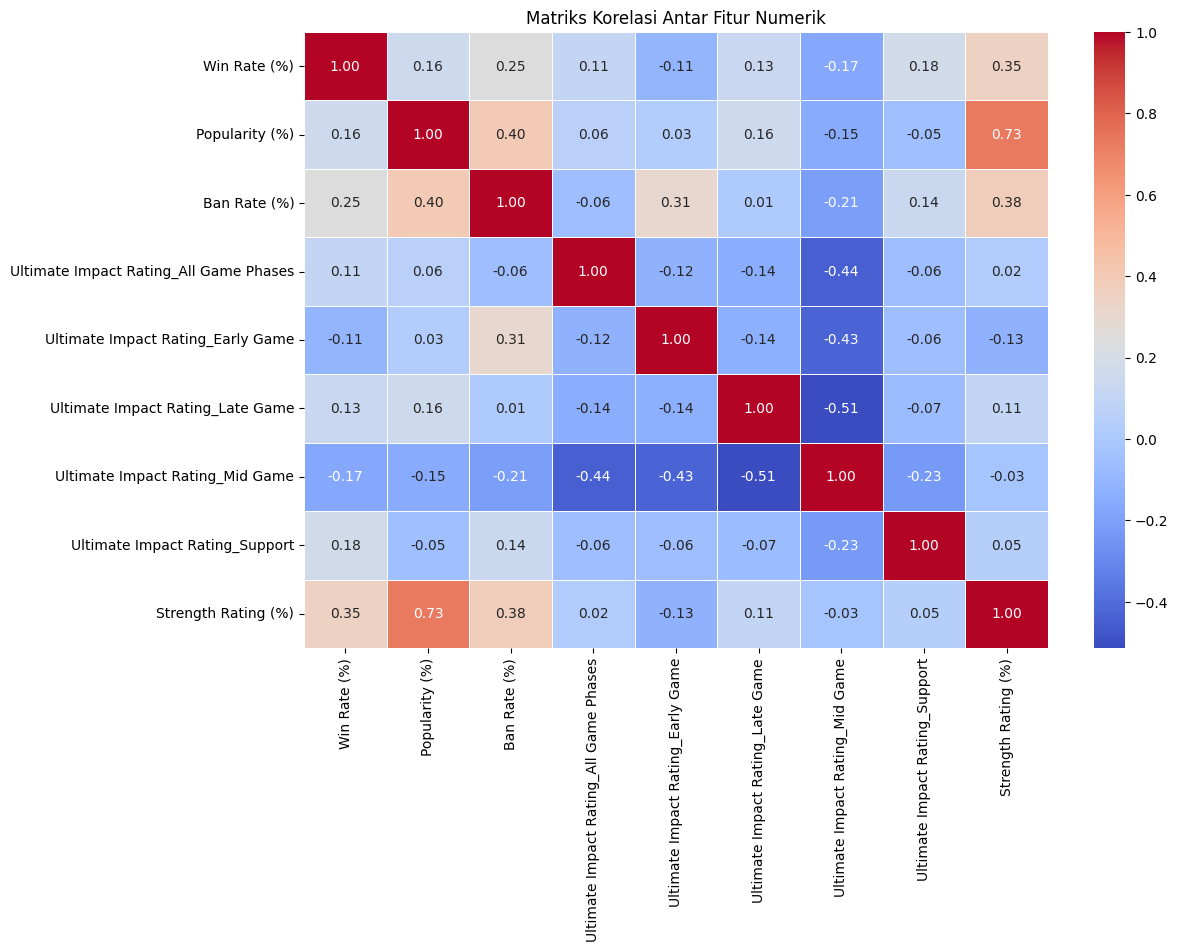

In [68]:
numerical_features = fitur.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

In [69]:
filtered_corr = correlation_matrix[correlation_matrix > 0.5]

In [70]:
filtered_corr.index

Index(['Win Rate (%)', 'Popularity (%)', 'Ban Rate (%)',
       'Ultimate Impact Rating_All Game Phases',
       'Ultimate Impact Rating_Early Game', 'Ultimate Impact Rating_Late Game',
       'Ultimate Impact Rating_Mid Game', 'Ultimate Impact Rating_Support',
       'Strength Rating (%)'],
      dtype='object')

In [71]:
match.columns

Index(['team1_Hero_1_Name', 'team1_Hero_2_Name', 'team1_Hero_3_Name',
       'team1_Hero_4_Name', 'team1_Hero_5_Name', 'team1_Hero_1_Role',
       'team1_Hero_2_Role', 'team1_Hero_3_Role', 'team1_Hero_4_Role',
       'team1_Hero_5_Role',
       ...
       'team2_Hero_5_Ultimate_Impact_Rating_Support',
       'team2_Hero_1_Strength_Rating', 'team2_Hero_2_Strength_Rating',
       'team2_Hero_3_Strength_Rating', 'team2_Hero_4_Strength_Rating',
       'team2_Hero_5_Strength_Rating', 'Persentase_Kemenangan_Tim_1',
       'Persentase_Kemenangan_Tim_2', 'result', 'validasi'],
      dtype='object', length=174)

## Modelling

In [72]:
features = match.select_dtypes(include=['number'])
target = match['result']

In [73]:
features.head()

,team1_Hero_1_Win_Rate,team1_Hero_2_Win_Rate,team1_Hero_3_Win_Rate,team1_Hero_4_Win_Rate,team1_Hero_5_Win_Rate,team1_Hero_1_Popularity,team1_Hero_2_Popularity,team1_Hero_3_Popularity,team1_Hero_4_Popularity,team1_Hero_5_Popularity,team1_Hero_1_Ban_Rate,team1_Hero_2_Ban_Rate,team1_Hero_3_Ban_Rate,team1_Hero_4_Ban_Rate,team1_Hero_5_Ban_Rate,team1_Hero_1_Scaling_Rating,team1_Hero_2_Scaling_Rating,team1_Hero_3_Scaling_Rating,team1_Hero_4_Scaling_Rating,team1_Hero_5_Scaling_Rating,team1_Hero_1_Cooldown_Rating,team1_Hero_2_Cooldown_Rating,team1_Hero_3_Cooldown_Rating,team1_Hero_4_Cooldown_Rating,team1_Hero_5_Cooldown_Rating,team1_Hero_1_Item_Dependency_Rating,team1_Hero_2_Item_Dependency_Rating,team1_Hero_3_Item_Dependency_Rating,team1_Hero_4_Item_Dependency_Rating,team1_Hero_5_Item_Dependency_Rating,team1_Hero_1_Mobility_Rating,team1_Hero_2_Mobility_Rating,team1_Hero_3_Mobility_Rating,team1_Hero_4_Mobility_Rating,team1_Hero_5_Mobility_Rating,team1_Hero_1_Crowd_Control_Rating,team1_Hero_2_Crowd_Control_Rating,team1_Hero_3_Crowd_Control_Rating,team1_Hero_4_Crowd_Control_Rating,team1_Hero_5_Crowd_Control_Rating,team1_Hero_1_Base_Stats_Growth_Rating,team1_Hero_2_Base_Stats_Growth_Rating,team1_Hero_3_Base_Stats_Growth_Rating,team1_Hero_4_Base_Stats_Growth_Rating,team1_Hero_5_Base_Stats_Growth_Rating,team1_Hero_1_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_2_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_3_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_4_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_5_Ultimate_Impact_Rating_All_Game_Phases,team1_Hero_1_Ultimate_Impact_Rating_Early_Game,team1_Hero_2_Ultimate_Impact_Rating_Early_Game,team1_Hero_3_Ultimate_Impact_Rating_Early_Game,team1_Hero_4_Ultimate_Impact_Rating_Early_Game,team1_Hero_5_Ultimate_Impact_Rating_Early_Game,team1_Hero_1_Ultimate_Impact_Rating_Late_Game,team1_Hero_2_Ultimate_Impact_Rating_Late_Game,team1_Hero_3_Ultimate_Impact_Rating_Late_Game,team1_Hero_4_Ultimate_Impact_Rating_Late_Game,team1_Hero_5_Ultimate_Impact_Rating_Late_Game,team1_Hero_1_Ultimate_Impact_Rating_Mid_Game,team1_Hero_2_Ultimate_Impact_Rating_Mid_Game,team1_Hero_3_Ultimate_Impact_Rating_Mid_Game,team1_Hero_4_Ultimate_Impact_Rating_Mid_Game,team1_Hero_5_Ultimate_Impact_Rating_Mid_Game,team1_Hero_1_Ultimate_Impact_Rating_Support,team1_Hero_2_Ultimate_Impact_Rating_Support,team1_Hero_3_Ultimate_Impact_Rating_Support,team1_Hero_4_Ultimate_Impact_Rating_Support,team1_Hero_5_Ultimate_Impact_Rating_Support,team1_Hero_1_Strength_Rating,team1_Hero_2_Strength_Rating,team1_Hero_3_Strength_Rating,team1_Hero_4_Strength_Rating,team1_Hero_5_Strength_Rating,team2_Hero_1_Win_Rate,team2_Hero_2_Win_Rate,team2_Hero_3_Win_Rate,team2_Hero_4_Win_Rate,team2_Hero_5_Win_Rate,team2_Hero_1_Popularity,team2_Hero_2_Popularity,team2_Hero_3_Popularity,team2_Hero_4_Popularity,team2_Hero_5_Popularity,team2_Hero_1_Ban_Rate,team2_Hero_2_Ban_Rate,team2_Hero_3_Ban_Rate,team2_Hero_4_Ban_Rate,team2_Hero_5_Ban_Rate,team2_Hero_1_Scaling_Rating,team2_Hero_2_Scaling_Rating,team2_Hero_3_Scaling_Rating,team2_Hero_4_Scaling_Rating,team2_Hero_5_Scaling_Rating,team2_Hero_1_Cooldown_Rating,team2_Hero_2_Cooldown_Rating,team2_Hero_3_Cooldown_Rating,team2_Hero_4_Cooldown_Rating,team2_Hero_5_Cooldown_Rating,team2_Hero_1_Item_Dependency_Rating,team2_Hero_2_Item_Dependency_Rating,team2_Hero_3_Item_Dependency_Rating,team2_Hero_4_Item_Dependency_Rating,team2_Hero_5_Item_Dependency_Rating,team2_Hero_1_Mobility_Rating,team2_Hero_2_Mobility_Rating,team2_Hero_3_Mobility_Rating,team2_Hero_4_Mobility_Rating,team2_Hero_5_Mobility_Rating,team2_Hero_1_Crowd_Control_Rating,team2_Hero_2_Crowd_Control_Rating,team2_Hero_3_Crowd_Control_Rating,team2_Hero_4_Crowd_Control_Rating,team2_Hero_5_Crowd_Control_Rating,team2_Hero_1_Base_Stats_Growth_Rating,team2_Hero_2_Base_Stats_Growth_Rating,team2_Hero_3_Base_Stats_Growth_Rating,team2_Hero_4_Base_Stats_Growth_Rating,team2_Hero_5_Base_Stats_Growth_Rating,team2_Hero_1_Ultimate_Impact_Rating_All_Game_Phases,team2_Hero_2

### Train Test Split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Scaling

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)

### Dimentional Reduction (PCA)

In [76]:
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)

In [77]:
X_test_pca = pca.transform(X_test_scaled)

### Build Model

In [78]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_pca, y_train)

c:\Users\legion\miniconda3\envs\tokek\lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [79]:
y_pred = model.predict(X_test_pca)

### Evaluasi

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy}")

Akurasi Model: 0.937


In [81]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Kalah       0.94      0.94      0.94       527
      Menang       0.93      0.93      0.93       473

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



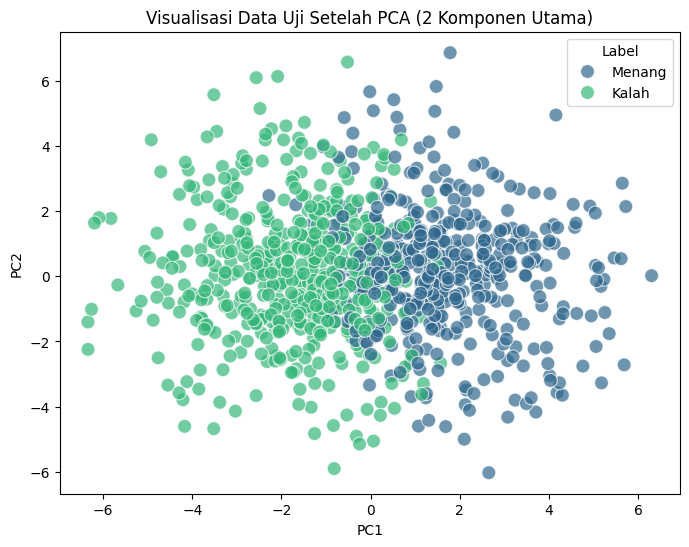

In [82]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, palette='viridis', s=100, alpha=0.7)

plt.title("Visualisasi Data Uji Setelah PCA (2 Komponen Utama)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Label', loc='upper right')
plt.show()

In [83]:
with open('../models/model.pkl', 'wb') as f:
    pickle.dump(model, f)
    
with open('../models/pca.pkl', 'wb') as f:
    pickle.dump(pca, f)